<a href="https://colab.research.google.com/github/jvictorferreira3301/Inteligencia_Computacional/blob/main/ak_decision_stump.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 10px;"/>



This code implements a Decision Stump as a DecisionTreeClassifier of depth = 1.

If you are using Colab, run the cell below to upload your datasets

In [39]:
from google.colab import files

print("Por favor, faça o upload do arquivo do dataset:")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Por favor, faça o upload do arquivo do dataset:


Saving estudante_202207040028_test.txt to estudante_202207040028_test (4).txt
Saving estudante_202207040028_validation.txt to estudante_202207040028_validation (5).txt
User uploaded file "estudante_202207040028_test (4).txt" with length 57 bytes
User uploaded file "estudante_202207040028_validation (5).txt" with length 44 bytes


If you are running locally, ensure that your datasets are in the same path of this Notebook and insert your registration number

In [40]:
matricula = input("Por favor, insira seu número de matrícula: ")

Por favor, insira seu número de matrícula: 202207040028


Automatically created module for IPython interactive environment
Por favor, escolha o tipo de conjunto de dados (train, test, validation): train
datasets:
[[ 3.e+03  4.e+00]
 [-4.e+03  0.e+00]
 [-4.e+03  3.e+00]
 [-2.e+03  2.e+00]
 [-5.e+03 -5.e+00]
 [ 0.e+00 -6.e+00]
 [-1.e+03 -6.e+00]
 [-3.e+03 -6.e+00]] [0. 0. 0. 0. 1. 1. 1. 1.]

The fitted decision stump:
|--- feature_1 <= -2.50
|   |--- class: 1.0
|--- feature_1 >  -2.50
|   |--- class: 0.0

correct labels=[0. 0. 0. 0. 1. 1. 1. 1.]
   predictions=[0. 0. 0. 0. 1. 1. 1. 1.]
[-2.5 -2.  -2. ]


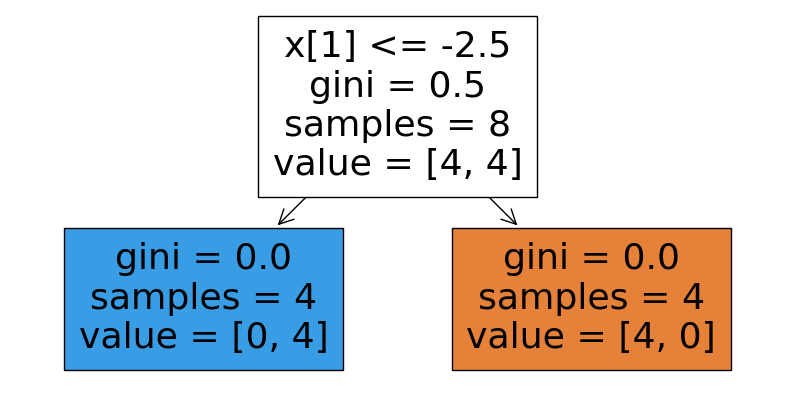

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import numpy as np

print(__doc__)
def load_dataset(matricula, dataset_type):
    filename = f'estudante_{matricula}_{dataset_type}.txt'
    my_data = np.genfromtxt(filename, delimiter=',')
    X = my_data[:,:2]
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    return X,y

dataset_type = input("Por favor, escolha o tipo de conjunto de dados (train, test, validation): ")

X, y = load_dataset(matricula, dataset_type)

print('datasets:')
print(X,y)

decision_stump = DecisionTreeClassifier(max_depth=200, min_samples_leaf=3,criterion='gini')
decision_stump.fit(X, y)

print('\nThe fitted decision stump:')
r = export_text(decision_stump)
print(r)

print(f'correct labels={y}\n   predictions={decision_stump.predict(X)}\n{decision_stump.tree_.threshold}')

plt.figure(figsize=(10,5))
plot_tree(decision_stump, filled=True)
plt.show()